## DSO104 - Data Wrangling and Visualization
### Lesson 3 - Dealing with Missing or Incorrect Data Types
______________
#### Page 13 - [Practice] Hands-On

**Requirements**

You are working for a global chocolate company, and they've collected [data on worldwide eating habits](https://repo.exeterlms.com/documents/V2/DataScience/Data-Wrang-Visual/Eating_Habits.zip). Their eventual goal is to determine the demographics for chocolate-eaters worldwide. Which countries are most likely to consume chocolate? Which gender, and which age group? Someone else will run these analyses, but it is your job to wrangle and recode the data in preparation.

#### Part 1: Recoding in Python
Please perform the following tasks in Python:

* Recode `Activity` into a new variable. Zeros should be not eating chocolate, and 1s should be eating chocolate.
* Recode `Frequency` from text to numbers in the same variable. The value zero should be the lowest frequency.
* Recode Sex from text to numbers in the same variable.
* Dummy code the `Age` group variable.

**Import package and data**

In [2]:
import pandas as pd

import matplotlib

In [3]:
eatingHabits = pd.read_csv('/Users/hannah/Library/CloudStorage/GoogleDrive-gracesnouveaux@gmail.com/My Drive/Bethel Tech/Data Science/DSO104 Data Wrangling and Visualization/Lesson 3: Dealing with Missing or Incorrect Data Types/Eating_Habits.csv')

In [4]:
eatingHabits

,REF_DATE,GEO,DGUID,Sex,Age group,Activity,Frequency,UOM,UOM_ID,SCALAR_FACTOR,SCALAR_ID,VECTOR,COORDINATE,VALUE,STATUS,SYMBOL,TERMINATED,DECIMALS
0,1990,Austria,NaN,Males,11 years,Eating fruit,More than once a day,Percent,239,units,0,v656366,1.1.1.1.1,34,NaN,NaN,NaN,0
1,1990,Austria,NaN,Males,11 years,Eating fruit,Once a day,Percent,239,units,0,v656367,1.1.1.1.2,42,NaN,NaN,NaN,0
2,1990,Austria,NaN,Males,11 years,Eating fruit,At least once a week,Percent,239,units,0,v656368,1.1.1.1.3,17,NaN,NaN,NaN,0
3,1990,Austria,NaN,Males,11 years,Eating fruit,Seldom,Percent,239,units,0,v656369,1.1.1.1.4,4,NaN,NaN,NaN,0
4,1990,Austria,NaN,Males,11 years,Eating fruit,Never,Percent,239,units,0,v656370,1.1.1.1.5,3,NaN,NaN,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20395,1998,Wales,NaN,Females,15 years,Drinking whole milk,More than once a day,Percent,239,units,0,v658761,30.2.3.12.1,0,NaN,NaN,NaN,0
20396,1998,Wales,NaN,Females,15 years,Drinking whole milk,Once a day,Percent,239,units,0,v658762,30.2.3.12.2,0,NaN,NaN,NaN,0
20397,1998,Wales,NaN,Females,15 years,Drinking whole milk,At least once a week,Percent,239,units,0,v658763,30.2.3.12.3,0,NaN,NaN,NaN,0
20398,1998,Wales,NaN,Females,15 years,Drinking whole milk,Seldom,Percent,239,units,0,v658764,30.2.3.12.4,0,NaN,NaN,NaN,0


**Recode `Activity` into a new variable. Zeros should be not eating chocolate, and 1s should be eating chocolate.**

*Check values for `Activity`*

In [5]:
eatingHabits['Activity'].value_counts()

Eating fruit                                             1890
Eating candy, chocolate bars                             1890
Eating french fries                                      1890
Eating hamburgers, hot dogs or sausages                  1890
Eating whole wheat or rye bread                          1890
Drinking soft drinks, cola or other drinks with sugar    1890
Drinking coffee                                          1890
Eating raw vegetables                                    1800
Eating potato chips, crisps                              1710
Drinking low fat milk                                    1440
Drinking whole milk                                      1440
Eating peanuts                                            780
Name: Activity, dtype: int64

*Create function for recoding*

In [7]:
def chocolate (series):
    if series == 'Eating fruit':
        return 0
    if series == 'Drinking soft drinks, cola or other drinks with sugar':
        return 0
    if series == 'Drinking coffee':
        return 0
    if series == 'Eating french fries':
        return 0
    if series == 'Eating hamburgers, hot dogs or sausages':
        return 0
    if series == 'Eating candy, chocolate bars':
        return 1
    if series == 'Eating whole wheat or rye bread':
        return 0
    if series == 'Eating raw vegetables':
        return 0
    if series == 'Eating potato chips, crisps':
        return 0
    if series == 'Drinking whole milk':
        return 0
    if series == 'Drinking low fat milk':
        return 0
    if series == 'Eating peanuts':
        return 0

eatingHabits['ChocolateYN'] = eatingHabits['Activity'].apply(chocolate)

eatingHabits.head()

,REF_DATE,GEO,DGUID,Sex,Age group,Activity,Frequency,UOM,UOM_ID,SCALAR_FACTOR,SCALAR_ID,VECTOR,COORDINATE,VALUE,STATUS,SYMBOL,TERMINATED,DECIMALS,ChocolateYN
0,1990,Austria,NaN,Males,11 years,Eating fruit,More than once a day,Percent,239,units,0,v656366,1.1.1.1.1,34,NaN,NaN,NaN,0,0
1,1990,Austria,NaN,Males,11 years,Eating fruit,Once a day,Percent,239,units,0,v656367,1.1.1.1.2,42,NaN,NaN,NaN,0,0
2,1990,Austria,NaN,Males,11 years,Eating fruit,At least once a week,Percent,239,units,0,v656368,1.1.1.1.3,17,NaN,NaN,NaN,0,0
3,1990,Austria,NaN,Males,11 years,Eating fruit,Seldom,Percent,239,units,0,v656369,1.1.1.1.4,4,NaN,NaN,NaN,0,0
4,1990,Austria,NaN,Males,11 years,Eating fruit,Never,Percent,239,units,0,v656370,1.1.1.1.5,3,NaN,NaN,NaN,0,0


<AxesSubplot: >

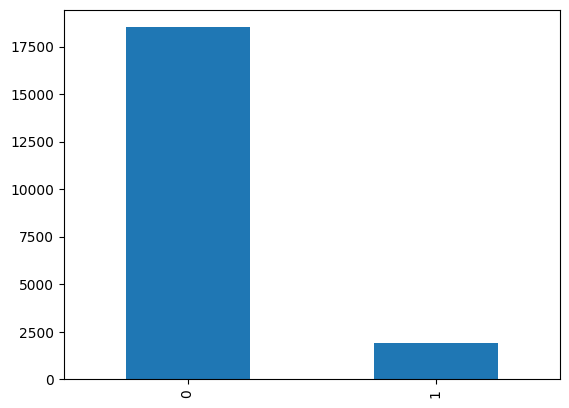

In [10]:
eatingHabits['ChocolateYN'].value_counts().plot(kind = 'bar')

**Recode `Frequency` from text to numbers in the same variable. The value zero should be the lowest frequency.**

*Check values for `Frequency`*

In [16]:
eatingHabits.Frequency.value_counts()

4    4080
3    4080
2    4080
1    4080
0    4080
Name: Frequency, dtype: int64

*Note: interesting that the data are evenly split!*

*Recode `Frequency` in same variable*

<AxesSubplot: >

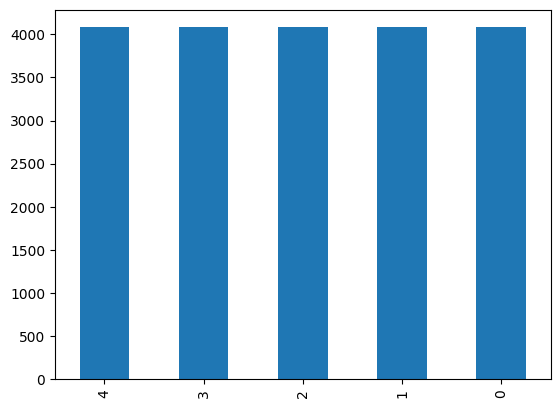

In [19]:
eatingHabitsFrequencyR = {'Frequency': 
                       {'Never': 0, 'Seldom': 1, 'At least once a week': 2, 
                        'Once a day': 3, 'More than once a day': 4}}

eatingHabits.replace(eatingHabitsFrequencyR, inplace=True)

eatingHabits['Frequency'].value_counts().plot(kind = 'bar')

**Recode `Sex` from text to numbers in the same variable.**

*Check values for `Sex`*

In [13]:
eatingHabits.Sex.value_counts()

Males      10200
Females    10200
Name: Sex, dtype: int64

*Note: interesting that these data are ALSO evenly split!*

*Recode `Sex` in same variable*

<AxesSubplot: >

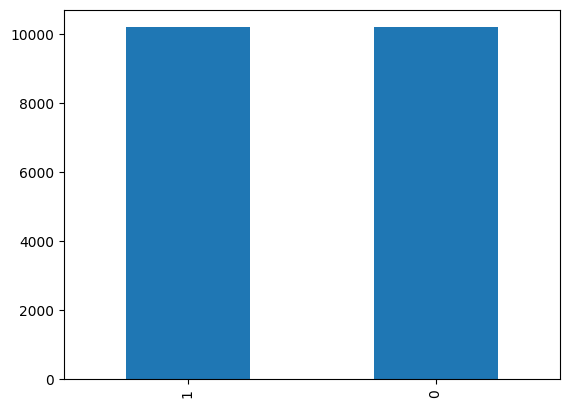

In [20]:
eatingHabitsSexR = {'Sex': {'Females': 0, 'Males': 1}}

eatingHabits.replace(eatingHabitsSexR, inplace=True)

eatingHabits['Sex'].value_counts().plot(kind = 'bar')

**Dummy code the `Age` group variable.**

*Recode `Age` via dummy coding*

In [21]:
ageDummy = pd.get_dummies(eatingHabits['Age group'], drop_first=True)

ageDummy

,13 years,15 years
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
...,...,...
20395,0,1
20396,0,1
20397,0,1
20398,0,1


*Append dummy data to main dataset*

In [22]:
eatingHabitsFinal = pd.concat([eatingHabits, ageDummy], axis=1)

eatingHabitsFinal.head()

,REF_DATE,GEO,DGUID,Sex,Age group,Activity,Frequency,UOM,UOM_ID,SCALAR_FACTOR,...,VECTOR,COORDINATE,VALUE,STATUS,SYMBOL,TERMINATED,DECIMALS,ChocolateYN,13 years,15 years
0,1990,Austria,NaN,1,11 years,Eating fruit,4,Percent,239,units,...,v656366,1.1.1.1.1,34,NaN,NaN,NaN,0,0,0,0
1,1990,Austria,NaN,1,11 years,Eating fruit,3,Percent,239,units,...,v656367,1.1.1.1.2,42,NaN,NaN,NaN,0,0,0,0
2,1990,Austria,NaN,1,11 years,Eating fruit,2,Percent,239,units,...,v656368,1.1.1.1.3,17,NaN,NaN,NaN,0,0,0,0
3,1990,Austria,NaN,1,11 years,Eating fruit,1,Percent,239,units,...,v656369,1.1.1.1.4,4,NaN,NaN,NaN,0,0,0,0
4,1990,Austria,NaN,1,11 years,Eating fruit,0,Percent,239,units,...,v656370,1.1.1.1.5,3,NaN,NaN,NaN,0,0,0,0
